In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [24]:
def display_img(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=plt.subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
img=cv2.imread('../DATA/car_plate.jpg')
img_conv=img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

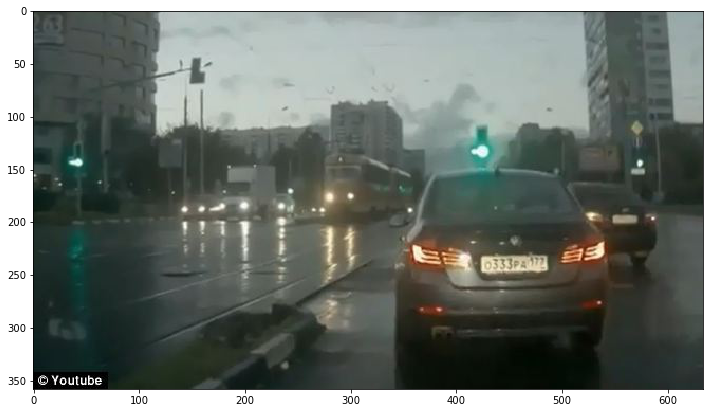

In [5]:
display_img(img_conv)

In [6]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
lp_cascade=cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [8]:
def detect_lp(img):
    
    img_c=img.copy()
    
    lp_rects=lp_cascade.detectMultiScale(img_c,scaleFactor=1.3,minNeighbors=3)
    
    for x,y,w,h in lp_rects:
        cv2.rectangle(img_c,(x,y),(x+w,y+h),255,7)
        
    return img_c

In [9]:
def blur_lp(img):
    
    img_c=img.copy()
    roi=img.copy()
    
    lp_rects=lp_cascade.detectMultiScale(img_c,scaleFactor=1.3,minNeighbors=3)
    
    for x,y,w,h in lp_rects:
        
        roi=roi[y:y+h,x:x+w]
        blurred_roi=cv2.medianBlur(roi,11)
        img_c[y:y+h,x:x+w] =blurred_roi
        
    return img_c
    

In [ ]:
plates_detected=False

In [44]:
def detect_lp_and_blur(img):
    global plates_detected
    img_c=img.copy()
    image=img.copy()
    
    lp_rects=lp_cascade.detectMultiScale(img_c,scaleFactor=1.3,minNeighbors=3)

   # print("No of plates detected " + str(len(lp_rects)))
    
    
    if len(lp_rects) > 0:
        plates_detected=True
    else:
        plates_detected=False
        
    
    for plate in lp_rects:  
       
        x,y,w,h=plate
        
        cv2.rectangle(img_c,(x,y),(x+w,y+h),255,7) #Ksize is taken too much as some picture are of much better quality

        roi=image[y:y+h, x:x+w]
        blurred_roi=cv2.GaussianBlur(roi,(9,9),10)
        img_c[y:y+h, x:x+w] = blurred_roi
        
        
        
    return img_c

Plot Plates Only

In [62]:
def plot_plates_only(img):
    global plates_detected
    
    img_c=img.copy()
    
    lp_rects=lp_cascade.detectMultiScale(img_c,scaleFactor=1.3,minNeighbors=3)
    
    
    
    for plate in lp_rects:
        
        x,y,w,h = plate
        roi=img_c[y:y+h, x:x+w]
        roi_=cv2.resize(roi,(150,100))
    
    return roi_
    

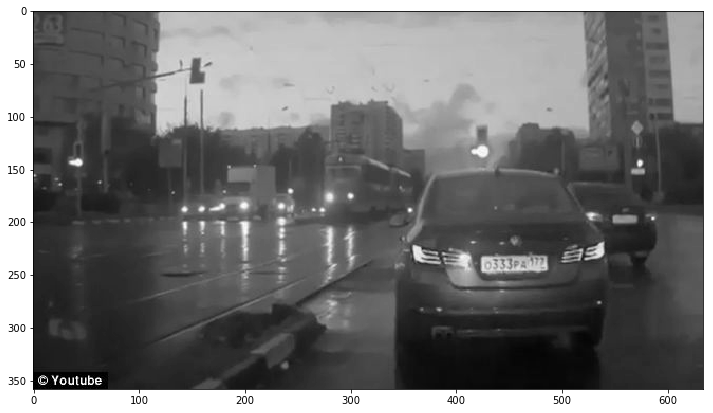

In [63]:
display_img(img_gray)

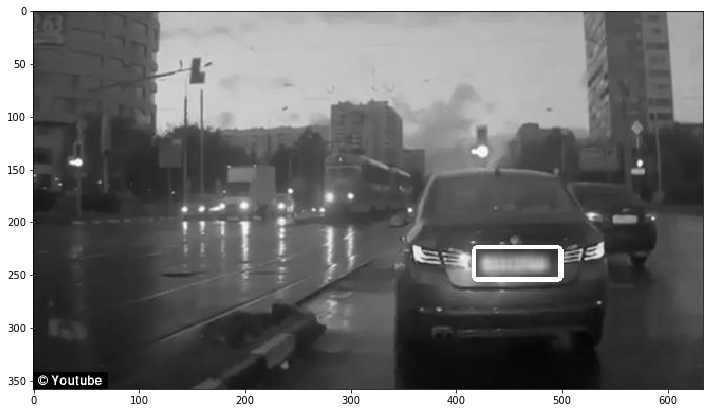

In [64]:
result=detect_lp_and_blur(img_gray)
display_img(result)

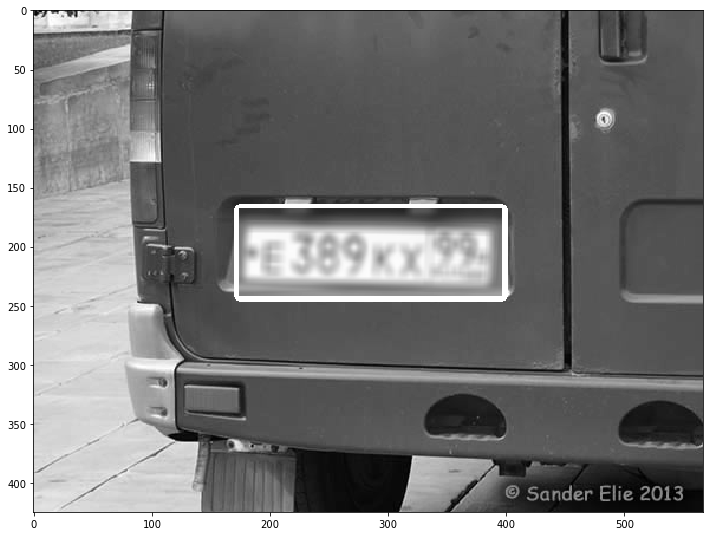

In [65]:
check=detect_lp_and_blur(testCase1)
display_img(check)

In [66]:
cap=cv2.VideoCapture('../DATA/test.mp4')

while cap.isOpened():

    ret,frame=cap.read()
        
    if ret == True:
        
        frame_c=frame.copy()
        
        
        frame_=detect_lp_and_blur(frame_c)
        
        cv2.namedWindow('Plates')
        
        if plates_detected:
            plates=plot_plates_only(frame_c)
            cv2.imshow('Plates',plates)
            
        else:
            print('no Plates detected')
        
        cv2.imshow('Testing',frame_)
        
        k=cv2.waitKey(1)

        if k == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates detected
no Plates de

In [55]:
#Take the image and extract the values